In [1]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
import pytest
%matplotlib inline

In [2]:
# implement forward propagation for network
# show that it correctly produces the correct boolean output values
# for each of the four possible combinations of x1 and x2

# Initialize x with the 4 possible combinations of 0 and 1 to generate 4 values for y(output)

# your code here

# Indicator activation function
def indicator(z):
    return 1 if z != 0.5 else 0

# Vectorized indicator function
def vectorized_indicator(z):
    return np.array([indicator(zi) for zi in z])

# Forward propagation
def forward_propagation(x):

    # Hidden layer
    W1 = np.array([[1, -1], [-1, 1]])
    b1 = np.array([-0.5, -0.5])

    h1 = np.dot(W1, x) + b1
    a1 = vectorized_indicator(h1)

    # Output layer
    W2 = np.array([1, 1])  # Weights for output layer
    b2 = -0.5              # Bias for output layer

    h2 = np.dot(W2, a1) + b2
    a2 = indicator(h2)

    return a2



inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

outputs = [forward_propagation(x) for x in inputs]

print("Inputs [x1  XNOR  x2] | Output (y)")
for x, y in zip(inputs, outputs):
    print("       ", x[0], "  XNOR  ", x[1], " |        ", y)

Inputs [x1  XNOR  x2] | Output (y)
        0   XNOR   0  |         1
        0   XNOR   1  |         0
        1   XNOR   0  |         0
        1   XNOR   1  |         1


In [3]:
import math

def relu(x):
    # your code here
     return max(0.0, x)

def sigmoid(x):
    # your code here
    return 1 / (1 + math.exp(-x))

def soft_max(x):
    # your code here
    """입력 벡터 x를 받아서 각 클래스에 대한 확률 분포를 반환. 이 확률 분포는 모든 값이 0과 1 사이에 있으며, 모든 값의 합은 1"""
    e_x = np.exp(x - np.max(x))   #입력값에서 최대값을 빼서 오버플로우 방지
    return e_x / e_x.sum(axis=0)

In [4]:
def mean_squared_error(yhat, y):
    return np.mean((yhat - y) ** 2)

def mean_absolute_error(yhat, y):
    return np.mean(np.abs(yhat - y))

def hinge(yhat, y):
    losses = np.maximum(0, 1 - yhat * y)  # Calculate individual losses
    mean_loss = np.mean(losses)  # Compute the mean loss
    return mean_loss

In [5]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap
%matplotlib inline

In [6]:
sizes = [2, 3, 1]  # 입력층 2개, 은닉층 3개, 출력층 1개
sizes[1:]

[3, 1]

In [7]:

class Network:
    def __init__(self, sizes):
        """
        Initialize the neural network

        :param sizes: a list of the number of neurons in each layer
        """
        # save the number of layers in the network
        self.L = len(sizes)

        # store the list of layer sizes
        self.sizes = sizes

        # initialize the bias vectors for each hidden and output layer
        self.b = [np.random.randn(n, 1) for n in self.sizes[1:]]

        # initialize the matrices of weights for each hidden and output layer
        self.W = [np.random.randn(n, m) for (m, n) in zip(self.sizes[:-1], self.sizes[1:])]

        # initialize the derivatives of biases for backprop
        self.db = [np.zeros((n, 1)) for n in self.sizes[1:]]

        # initialize the derivatives of weights for backprop
        self.dW = [np.zeros((n, m)) for (m,n) in zip(self.sizes[:-1], self.sizes[1:])]

        # initialize the activities on each hidden and output layer
        self.z = [np.zeros((n, 1)) for n in self.sizes]

        # initialize the activations on each hidden and output layer
        self.a = [np.zeros((n, 1)) for n in self.sizes]

        # initialize the deltas on each hidden and output layer
        self.delta = [np.zeros((n, 1)) for n in self.sizes]

In [8]:
nn = Network([2,3,2])

In [9]:
sizes = [2,3,2]
a = [np.zeros((n, 1)) for n in sizes]
print("a:  ", a)

a:   [array([[0.],
       [0.]]), array([[0.],
       [0.],
       [0.]]), array([[0.],
       [0.]])]


In [10]:
len(sizes)

3

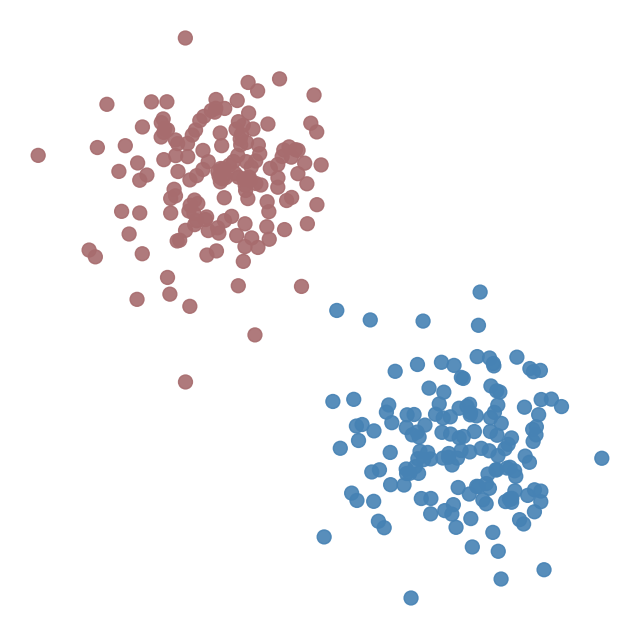

In [11]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap
%matplotlib inline

class Network:
    def __init__(self, sizes):
        """
        Initialize the neural network

        :param sizes: a list of the number of neurons in each layer
        """
        # save the number of layers in the network
        self.L = len(sizes)

        # store the list of layer sizes
        self.sizes = sizes

        # initialize the bias vectors for each hidden and output layer
        self.b = [np.random.randn(n, 1) for n in self.sizes[1:]]

        # initialize the matrices of weights for each hidden and output layer
        self.W = [np.random.randn(n, m) for (m, n) in zip(self.sizes[:-1], self.sizes[1:])]

        # initialize the derivatives of biases for backprop
        self.db = [np.zeros((n, 1)) for n in self.sizes[1:]]

        # initialize the derivatives of weights for backprop
        self.dW = [np.zeros((n, m)) for (m,n) in zip(self.sizes[:-1], self.sizes[1:])]

        # initialize the activities on each hidden and output layer
        self.z = [np.zeros((n, 1)) for n in self.sizes]

        # initialize the activations on each hidden and output layer
        self.a = [np.zeros((n, 1)) for n in self.sizes]

        # initialize the deltas on each hidden and output layer
        self.delta = [np.zeros((n, 1)) for n in self.sizes]

    def g(self, z):
        """
        sigmoid activation function

        :param z: vector of activities to apply activation to
        """
        return 1.0 / (1.0 + np.exp(-z))

    def g_prime(self, z):
        """
        derivative of sigmoid activation function

        :param z: vector of activities to apply derivative of activation to
        """
        return self.g(z) * (1.0 - self.g(z))

    def grad_loss(self, a, y):
        """
        evaluate gradient of cost function for squared-loss C(a,y) = (a-y)^2/2

        :param a: activations on output layer
        :param y: vector-encoded label
        """
        return (a - y)

    def forward_prop(self, x):
        """
        take an feature vector and propagate through network
        :param x: input feature vector
        """
        if len(x.shape) == 1:
            x = x.reshape(-1, 1)
        # TODO: step 1. Initialize activation on initial layer to x
        # your code here
        self.a[0] = x

        ## TODO: step 2-4. Loop over layers and compute activities and activations
        ## Use Sigmoid activation function defined above
        # your code here

        for ll in range(self.L - 1):
            self.z[ll + 1] = np.dot(self.W[ll], self.a[ll]) + self.b[ll]
            self.a[ll + 1] = self.g(self.z[ll + 1])


    def back_prop(self, x, y):
        """
        Back propagation to get derivatives of C wrt weights and biases for given training example

        :param x: training features
        :param y: vector-encoded label
        """

        if len(y.shape) == 1:
            y = y.reshape(-1, 1)

        # TODO: step 1. forward prop training example to fill in activities and activations
        # your code here
        self.forward_prop(x)

        # TODO: step 2. compute deltas on output layer (Hint: python index numbering starts from 0 ends at N-1)
        # Correction in Instructions: From the instructions mentioned below for backward propagation,
        # Use normal product instead of dot product in Step 2 and 6
        # The derivative and gradient functions have already been implemented for you
        # your code here

        self.delta[self.L - 1] = self.g_prime(self.z[self.L - 1]) * self.grad_loss(self.a[self.L-1], y)

        # TODO: step 3-6. loop backward through layers, backprop deltas, compute dWs and dbs
        # your code here

        for ll in range(self.L-2, -1, -1):
            self.dW[ll] = np.dot(self.delta[ll + 1], self.a[ll].T)
            self.db[ll] = self.delta[ll + 1]
            self.delta[ll] = np.dot(self.W[ll].T, self.delta[ll + 1]) * self.g_prime(self.z[ll])


    def train(self, X_train, y_train, X_valid=None, y_valid=None,
              eta=0.25, num_epochs=10, isPrint=True, isVis=False):
        """
        Train the network with SGD

        :param X_train: matrix of training features
        :param y_train: matrix of vector-encoded labels
        """

        # initialize shuffled indices
        shuffled_inds = list(range(X_train.shape[0]))

        # loop over training epochs (step 1.)
        for ep in range(num_epochs):

            # shuffle indices
            np.random.shuffle(shuffled_inds)

            # loop over training examples (step 2.)
            for ind in shuffled_inds:

                # TODO: step 3. back prop to get derivatives
                # your code here
                self.back_prop(X_train[ind, :], y_train[ind, :])

                # TODO: step 4. update all weights and biases for all layers
                # your code here
                for ll in range(self.L - 1): # (partial score 2)
                    self.W[ll] = self.W[ll] - eta * self.dW[ll] # (partial score 2)
                    self.b[ll] = self.b[ll] - eta * self.db[ll] # (partial score 2)

                    # print mean loss every 10 epochs if requested
                    if isPrint and (ep % 10) == 0:
                        print("epoch {:3d}/{:3d}: ".format(ep, num_epochs), end="")
                        print("  train loss: {:8.3f}".format(self.compute_loss(X_train, y_train)), end="")
                        if X_valid is not None:
                            print("  validation loss: {:8.3f}".format(self.compute_loss(X_valid, y_valid)))
                        else:
                            print("")

                    if isVis and (ep % 20) == 0:
                        self.pretty_pictures(X_train, y_train, decision_boundary=True, epoch=ep)

    def compute_loss(self, X, y):
        """
        compute average loss for given data set

        :param X: matrix of features
        :param y: matrix of vector-encoded labels
        """
        loss = 0
        if len(X.shape) == 1:
            X = X[np.newaxis, :]
        if len(y.shape) == 1:
            y = y[np.newaxis, :]
        for x, t in zip(X, y):
            self.forward_prop(x)
            if len(t.shape) == 1:
                t = t.reshape(-1, 1)
            loss += 0.5 * np.sum((self.a[-1] - t) ** 2)
        return loss / X.shape[0]


    def gradient_check(self, x, y, h=1e-5):
        """
        check whether the gradient is correct for X, y

        Assuming that back_prop has finished.
        """
        for ll in range(self.L - 1):
            oldW = self.W[ll].copy()
            oldb = self.b[ll].copy()
            for i in range(self.W[ll].shape[0]):
                for j in range(self.W[ll].shape[1]):
                    self.W[ll][i, j] = oldW[i, j] + h
                    lxph = self.compute_loss(x, y)
                    self.W[ll][i, j] = oldW[i, j] - h
                    lxmh = self.compute_loss(x, y)
                    grad = (lxph - lxmh) / (2 * h)
                    assert abs(self.dW[ll][i, j] - grad) < 1e-5
                    self.W[ll][i, j] = oldW[i, j]
            for i in range(self.b[ll].shape[0]):
                j = 0
                self.b[ll][i, j] = oldb[i, j] + h
                lxph = self.compute_loss(x, y)
                self.b[ll][i, j] = oldb[i, j] - h
                lxmh = self.compute_loss(x, y)
                grad = (lxph - lxmh) / (2 * h)
                assert abs(self.db[ll][i, j] - grad) < 1e-5
                self.b[ll][i, j] = oldb[i, j]


    def pretty_pictures(self, X, y, decision_boundary=False, epoch=None):
        """
        Function to plot data and neural net decision boundary

        :param X: matrix of features
        :param y: matrix of vector-encoded labels
        :param decision_boundary: whether or not to plot decision
        :param epoch: epoch number for printing
        """

        mycolors = {"blue": "steelblue", "red": "#a76c6e"}
        colorlist = [c for (n,c) in mycolors.items()]
        colors = [colorlist[np.argmax(yk)] for yk in y]

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))

        if decision_boundary:
            xx, yy = np.meshgrid(np.linspace(-1.25,1.25,300), np.linspace(-1.25,1.25,300))
            grid = np.column_stack((xx.ravel(), yy.ravel()))
            grid_pred = np.zeros_like(grid[:,0])
            for ii in range(len(grid_pred)):
                self.forward_prop(grid[ii,:])
                grid_pred[ii] = np.argmax(self.a[-1])
            grid_pred = grid_pred.reshape(xx.shape)
            cmap = ListedColormap([
                colorConverter.to_rgba('steelblue', alpha=0.30),
                colorConverter.to_rgba('#a76c63', alpha=0.30)])
            plt.contourf(xx, yy, grid_pred, cmap=cmap)
            if epoch is not None: plt.text(-1.23,1.15, "epoch = {:d}".format(epoch), fontsize=16)

        plt.scatter(X[:,0], X[:,1], color=colors, s=100, alpha=0.9)
        plt.axis('off')

def generate_data(N, config="checkerboard"):
    X = np.zeros((N,2))
    y = np.zeros((N,2)).astype(int)

    if config=="checkerboard":
        nps, sqlen = N//9, 2/3
        ctr = 0
        for ii in range(3):
            for jj in range(3):
                X[ctr * nps : (ctr + 1) * nps, :] = np.column_stack(
                    (np.random.uniform(ii * sqlen +.05-1, (ii+1) * sqlen - .05 -1, size=nps),
                     np.random.uniform(jj * sqlen +.05-1, (jj+1) * sqlen - .05 -1, size=nps)))
                y[ctr*nps:(ctr+1)*nps,(3*ii+jj)%2] = 1
                ctr += 1

    if config=="blobs":
        X, yflat = datasets.make_blobs(n_samples=N, centers=[[-.5,.5],[.5,-.5]],
                                       cluster_std=[.20,.20],n_features=2)
        for kk, yk in enumerate(yflat):
            y[kk,:] = np.array([1,0]) if yk else np.array([0,1])


    if config=="circles":
        kk=0
        while kk < N / 2:
            sample = 2 * np.random.rand(2) - 1
            if np.linalg.norm(sample) <= .45:
                X[kk,:] = sample
                y[kk,:] = np.array([1,0])
                kk += 1
        while kk < N:
            sample = 2 * np.random.rand(2) - 1
            dist = np.linalg.norm(sample)
            if dist < 0.9 and dist > 0.55:
                X[kk,:] = sample
                y[kk,:] = np.array([0,1])
                kk += 1

    if config=="moons":
        X, yflat = datasets.make_moons(n_samples=N, noise=.05)
        X[:,0] = .5 * (X[:,0] - .5)
        X[:,1] = X[:,1] - .25
        for kk, yk in enumerate(yflat):
            y[kk, :] = np.array([1,0]) if yk else np.array([0,1])

    return X, y

from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")

# play with this cell to look at the various data sets available
# your code here

nn = Network([2,3,2])
X_train, y_train = generate_data(300, "blobs")
nn.pretty_pictures(X_train, y_train, decision_boundary=False)

In [12]:
print(X_train.shape)

(300, 2)


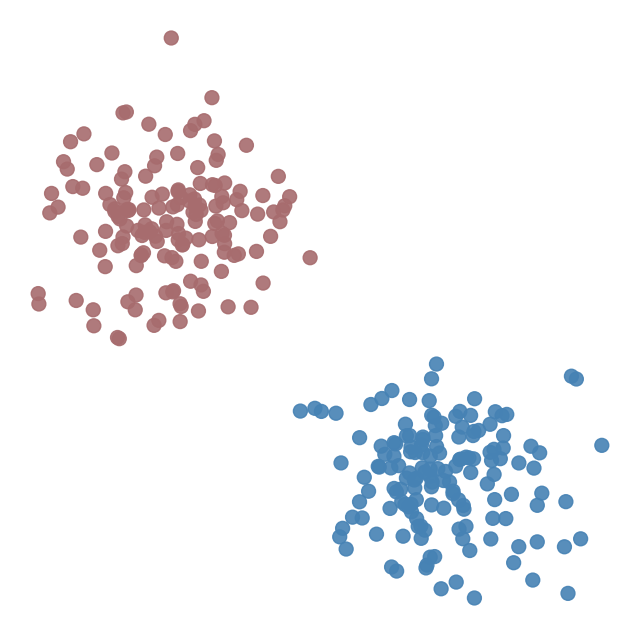

In [15]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap
%matplotlib inline

class NeuralNetwork:
    def __init__(self, layer_sizes):
        """
        Initialize the neural network

        :param layer_sizes: a list of the number of neurons in each layer
        """
        # save the number of layers in the network
        self.num_layers = len(layer_sizes)

        # store the list of layer sizes
        self.layer_sizes = layer_sizes

        # initialize the bias vectors for each hidden and output layer
        self.biases = [np.random.randn(neurons, 1) for neurons in self.layer_sizes[1:]]

        # initialize the matrices of weights for each hidden and output layer
        self.weights = [np.random.randn(neurons, prev_neurons) for prev_neurons, neurons in zip(self.layer_sizes[:-1], self.layer_sizes[1:])]

        # initialize the derivatives of biases for backprop
        self.bias_derivatives = [np.zeros((neurons, 1)) for neurons in self.layer_sizes[1:]]

        # initialize the derivatives of weights for backprop
        self.weight_derivatives = [np.zeros((neurons, prev_neurons)) for prev_neurons, neurons in zip(self.layer_sizes[:-1], self.layer_sizes[1:])]

        # initialize the activities on each hidden and output layer
        self.activities = [np.zeros((neurons, 1)) for neurons in self.layer_sizes]

        # initialize the activations on each hidden and output layer
        self.activations = [np.zeros((neurons, 1)) for neurons in self.layer_sizes]

        # initialize the deltas on each hidden and output layer
        self.deltas = [np.zeros((neurons, 1)) for neurons in self.layer_sizes]

    def sigmoid(self, z):
        """
        sigmoid activation function

        :param z: vector of activities to apply activation to
        """
        return 1.0 / (1.0 + np.exp(-z))

    def sigmoid_derivative(self, z):
        """
        derivative of sigmoid activation function

        :param z: vector of activities to apply derivative of activation to
        """
        return self.sigmoid(z) * (1.0 - self.sigmoid(z))

    def loss_gradient(self, activation, target):
        """
        evaluate gradient of cost function for squared-loss C(a,y) = (a-y)^2/2

        :param activation: activations on output layer
        :param target: vector-encoded label
        """
        return (activation - target)

    def forward_propagation(self, input_data):
        """
        take an feature vector and propagate through network
        :param input_data: input feature vector
        """
        if len(input_data.shape) == 1:
            input_data = input_data.reshape(-1, 1)

        # Initialize activation on initial layer to input_data
        self.activations[0] = input_data

        # Loop over layers and compute activities and activations
        for layer in range(self.num_layers - 1):
            self.activities[layer + 1] = np.dot(self.weights[layer], self.activations[layer]) + self.biases[layer]
            self.activations[layer + 1] = self.sigmoid(self.activities[layer + 1])


    def back_propagation(self, input_data, target):
        """
        Back propagation to get derivatives of C wrt weights and biases for given training example

        :param input_data: training features
        :param target: vector-encoded label
        """

        if len(target.shape) == 1:
            target = target.reshape(-1, 1)

        # Forward propagate training example to fill in activities and activations
        self.forward_propagation(input_data)

        # Compute deltas on output layer
        self.deltas[self.num_layers - 1] = self.sigmoid_derivative(self.activities[self.num_layers - 1]) * self.loss_gradient(self.activations[self.num_layers - 1], target)

        # Loop backward through layers, backprop deltas, compute weight_derivatives and bias_derivatives
        for layer in range(self.num_layers - 2, -1, -1):
            self.weight_derivatives[layer] = np.dot(self.deltas[layer + 1], self.activations[layer].T)
            self.bias_derivatives[layer] = self.deltas[layer + 1]
            self.deltas[layer] = np.dot(self.weights[layer].T, self.deltas[layer + 1]) * self.sigmoid_derivative(self.activities[layer])


    def train(self, training_data, training_labels, validation_data=None, validation_labels=None,
              learning_rate=0.25, num_epochs=10, print_progress=True, visualize=False):
        """
        Train the network with SGD

        :param training_data: matrix of training features
        :param training_labels: matrix of vector-encoded labels
        """

        # initialize shuffled indices
        shuffled_indices = list(range(training_data.shape[0]))

        # loop over training epochs
        for epoch in range(num_epochs):

            # shuffle indices
            np.random.shuffle(shuffled_indices)

            # loop over training examples
            for index in shuffled_indices:

                # Back propagate to get derivatives
                self.back_propagation(training_data[index, :], training_labels[index, :])

                # Update all weights and biases for all layers
                for layer in range(self.num_layers - 1):
                    self.weights[layer] = self.weights[layer] - learning_rate * self.weight_derivatives[layer]
                    self.biases[layer] = self.biases[layer] - learning_rate * self.bias_derivatives[layer]

                    # print mean loss every 10 epochs if requested
                    if print_progress and (epoch % 10) == 0:
                        print("epoch {:3d}/{:3d}: ".format(epoch, num_epochs), end="")
                        print("  train loss: {:8.3f}".format(self.compute_loss(training_data, training_labels)), end="")
                        if validation_data is not None:
                            print("  validation loss: {:8.3f}".format(self.compute_loss(validation_data, validation_labels)))
                        else:
                            print("")

                    if visualize and (epoch % 20) == 0:
                        self.visualize_decision_boundary(training_data, training_labels, decision_boundary=True, epoch=epoch)

    def compute_loss(self, data, labels):
        """
        compute average loss for given data set

        :param data: matrix of features
        :param labels: matrix of vector-encoded labels
        """
        loss = 0
        if len(data.shape) == 1:
            data = data[np.newaxis, :]
        if len(labels.shape) == 1:
            labels = labels[np.newaxis, :]
        for input_data, target in zip(data, labels):
            self.forward_propagation(input_data)
            if len(target.shape) == 1:
                target = target.reshape(-1, 1)
            loss += 0.5 * np.sum((self.activations[-1] - target) ** 2)
        return loss / data.shape[0]


    def gradient_check(self, input_data, target, h=1e-5):
        """
        check whether the gradient is correct for input_data, target

        Assuming that back_propagation has finished.
        """
        for layer in range(self.num_layers - 1):
            old_weights = self.weights[layer].copy()
            old_biases = self.biases[layer].copy()
            for i in range(self.weights[layer].shape[0]):
                for j in range(self.weights[layer].shape[1]):
                    self.weights[layer][i, j] = old_weights[i, j] + h
                    loss_plus_h = self.compute_loss(input_data, target)
                    self.weights[layer][i, j] = old_weights[i, j] - h
                    loss_minus_h = self.compute_loss(input_data, target)
                    gradient = (loss_plus_h - loss_minus_h) / (2 * h)
                    assert abs(self.weight_derivatives[layer][i, j] - gradient) < 1e-5
                    self.weights[layer][i, j] = old_weights[i, j]
            for i in range(self.biases[layer].shape[0]):
                j = 0
                self.biases[layer][i, j] = old_biases[i, j] + h
                loss_plus_h = self.compute_loss(input_data, target)
                self.biases[layer][i, j] = old_biases[i, j] - h
                loss_minus_h = self.compute_loss(input_data, target)
                gradient = (loss_plus_h - loss_minus_h) / (2 * h)
                assert abs(self.bias_derivatives[layer][i, j] - gradient) < 1e-5
                self.biases[layer][i, j] = old_biases[i, j]


    def visualize_decision_boundary(self, data, labels, decision_boundary=False, epoch=None):
        """
        Function to plot data and neural net decision boundary

        :param data: matrix of features
        :param labels: matrix of vector-encoded labels
        :param decision_boundary: whether or not to plot decision
        :param epoch: epoch number for printing
        """

        my_colors = {"blue": "steelblue", "red": "#a76c6e"}
        color_list = [c for (n,c) in my_colors.items()]
        colors = [color_list[np.argmax(label)] for label in labels]

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))

        if decision_boundary:
            xx, yy = np.meshgrid(np.linspace(-1.25,1.25,300), np.linspace(-1.25,1.25,300))
            grid = np.column_stack((xx.ravel(), yy.ravel()))
            grid_predictions = np.zeros_like(grid[:,0])
            for ii in range(len(grid_predictions)):
                self.forward_propagation(grid[ii,:])
                grid_predictions[ii] = np.argmax(self.activations[-1])
            grid_predictions = grid_predictions.reshape(xx.shape)
            cmap = ListedColormap([
                colorConverter.to_rgba('steelblue', alpha=0.30),
                colorConverter.to_rgba('#a76c63', alpha=0.30)])
            plt.contourf(xx, yy, grid_predictions, cmap=cmap)
            if epoch is not None: plt.text(-1.23,1.15, "epoch = {:d}".format(epoch), fontsize=16)

        plt.scatter(data[:,0], data[:,1], color=colors, s=100, alpha=0.9)
        plt.axis('off')

def generate_data(num_samples, config="checkerboard"):
    data = np.zeros((num_samples, 2))
    labels = np.zeros((num_samples, 2)).astype(int)

    if config=="checkerboard":
        samples_per_square, square_length = num_samples // 9, 2/3
        counter = 0
        for ii in range(3):
            for jj in range(3):
                data[counter * samples_per_square : (counter + 1) * samples_per_square, :] = np.column_stack(
                    (np.random.uniform(ii * square_length +.05-1, (ii+1) * square_length - .05 -1, size=samples_per_square),
                     np.random.uniform(jj * square_length +.05-1, (jj+1) * square_length - .05 -1, size=samples_per_square)))
                labels[counter * samples_per_square:(counter + 1) * samples_per_square, (3 * ii + jj) % 2] = 1
                counter += 1

    if config=="blobs":
        data, flat_labels = datasets.make_blobs(n_samples=num_samples, centers=[[-.5,.5],[.5,-.5]],
                                       cluster_std=[.20,.20],n_features=2)
        for kk, label in enumerate(flat_labels):
            labels[kk,:] = np.array([1,0]) if label else np.array([0,1])


    if config=="circles":
        kk=0
        while kk < num_samples / 2:
            sample = 2 * np.random.rand(2) - 1
            if np.linalg.norm(sample) <= .45:
                data[kk,:] = sample
                labels[kk,:] = np.array([1,0])
                kk += 1
        while kk < num_samples:
            sample = 2 * np.random.rand(2) - 1
            dist = np.linalg.norm(sample)
            if dist < 0.9 and dist > 0.55:
                data[kk,:] = sample
                labels[kk,:] = np.array([0,1])
                kk += 1

    if config=="moons":
        data, flat_labels = datasets.make_moons(n_samples=num_samples, noise=.05)
        data[:,0] = .5 * (data[:,0] - .5)
        data[:,1] = data[:,1] - .25
        for kk, label in enumerate(flat_labels):
            labels[kk, :] = np.array([1,0]) if label else np.array([0,1])

    return data, labels

from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")

# play with this cell to look at the various data sets available
# your code here

nn = NeuralNetwork([2, 3, 2])
X_train, y_train = generate_data(300, "blobs")
nn.visualize_decision_boundary(X_train, y_train, decision_boundary=False)